# K Nearest Neighbors (KNN)

K-Nearest Neighbors is a **non-parametric**, **lazy** learning algorithm. 

What does this mean?

- **Non-parametric models** make no underlying assumptions about the distribution of data
- **Lazy learners** (or **instance-based** learning methods) simply store the training examples and postpone the generalization (building a model) until a new instance must be classified or prediction made
    - In other words, no training is necessary! This makes training super fast but testing is slower and costly

### What should the grey point be?

![example scenario](images/scenario.png)

## KNN has the following basic steps:

![knn process](images/knn-process.png)

**The algorithm can be summarized as:**

1. A positive integer `k` is specified
2. We select the `k` entries in our training data which are closest to the new sample
3. We find the most common classification of these entries (voting)
4. This is the classification we give to the new sample

**A few other features of KNN:**

* KNN stores the entire training dataset which it uses as its representation
* KNN does not learn any model parameters
* KNN makes predictions 'just-in-time' by calculating the similarity between an input sample and each training instance

**Note:** KNN performs better with a low number of features. The more features you have the more data you need. You increase the dimensions everytime you add another feature. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.

Resource on the Curse of Dimensionality for classification: https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/

### Voting

How to break ties:

1. When doing a binary classification, often use a odd `k` to avoid ties.
2. Multiple approaches for multi-class problems:
    - Reduce the `k` by 1 to see who wins.
    - Weight the votes based on the distance of the neighbors

### Example training data

This example uses a multi-class problem and each color represents a different class.

![data overview](images/04_knn_dataset.png)

### KNN classification map (K=1)

![1NN classification map](images/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](images/04_5nn_map.png)

## Distance Metrics

### What are distance metrics? 

Formulas that can be used to measure the distance between our variables 

![](https://miro.medium.com/max/1400/1*FlMiuoENrq52tMV4S6LSZg.png)

* Euclidean and Manhattan distance are typically best for continuous variables 

## Implementing the KNN Classifier with SKlearn

For reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [1]:
# Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Read data
df = pd.read_csv('data/diabetes.csv')

In [3]:
# Explore
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


[Following this analysis for part of this section](https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed)

Can the minimum value of all of these columns be zero (0)?

Should not be zero:
- BloodPressure, SkinThickness, Glucose, BMI


In [6]:
# Replace with proper nulls
needs_null = ['BloodPressure', 'SkinThickness', 'Glucose', 'BMI']

df[needs_null] = df[needs_null].replace(0, np.NaN)

In [7]:
# Sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     768 non-null int64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,768.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,115.244002,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


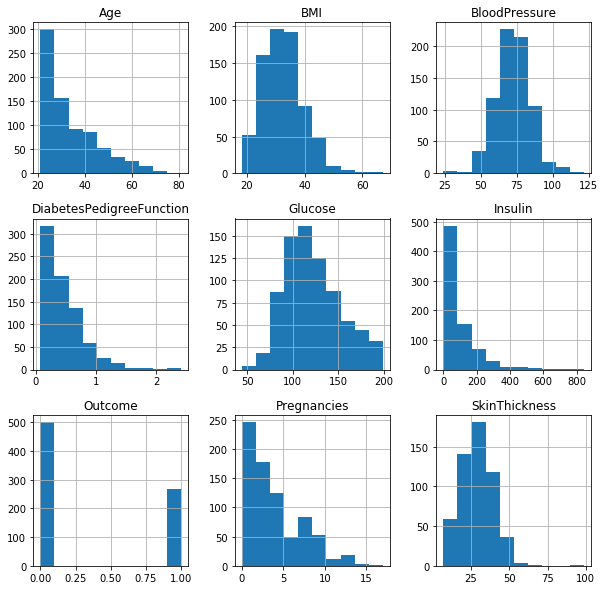

In [9]:
# Use distributions to decide imputation strategy
df.hist(figsize=(10,10))
plt.show()

In [10]:
# Check class imbalance - although less of a problem for KNN (KNN looks for location)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [12]:
df['Outcome'].value_counts()[0]/len(df)

0.6510416666666666

In [13]:
# Create X and y
used_cols = [c for c in df.columns if c not in ['Outcome']]

X = df[used_cols]
y = df['Outcome']

In [14]:
# Need more imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [15]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# Need to impute then scale data - KNN is sensitive to scale!
imputer = SimpleImputer()
scaler = StandardScaler()

In [17]:
# Fit and transform
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

X_train_processed = scaler.fit_transform(X_train_imp)
X_test_processed = scaler.transform(X_test_imp)

In [18]:
# And now, modeling!
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier()

knn.fit(X_train_processed, y_train)

KNeighborsClassifier()

In [20]:
# Predictions for the testing set
y_pred_class = knn.predict(X_test_processed)

In [21]:
# Metrics
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred_class):.4f}')
print(f'F1: {metrics.f1_score(y_test, y_pred_class):.4f}')

Accuracy: 0.7917
F1: 0.6875


- F1_score is a blend of precision and recall (get some idea how other metrics work)

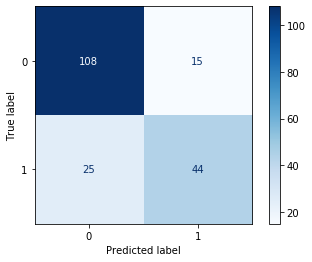

In [22]:
metrics.plot_confusion_matrix(knn, X_test_processed, y_test, cmap=plt.cm.Blues)

## Using a different value for K

In [23]:
# instantiate the model (using some other value)
knn = KNeighborsClassifier(n_neighbors=11)

# fit the model with data
knn.fit(X_train_processed, y_train)

# make class predictions for the testing set
y_pred_train = knn.predict(X_train_processed)
y_pred_test = knn.predict(X_test_processed)

In [24]:
print(f'Accuracy: {metrics.accuracy_score(y_train, y_pred_train):.4f}')
print(f'F1: {metrics.f1_score(y_train, y_pred_train):.4f}')

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred_test):.4f}')
print(f'F1: {metrics.f1_score(y_test, y_pred_test):.4f}')

Accuracy: 0.7882
F1: 0.6592
Accuracy: 0.7969
F1: 0.6929


In [25]:
print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       377
           1       0.74      0.59      0.66       199

    accuracy                           0.79       576
   macro avg       0.77      0.74      0.75       576
weighted avg       0.78      0.79      0.78       576



In [26]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       123
           1       0.76      0.64      0.69        69

    accuracy                           0.80       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.79      0.80      0.79       192



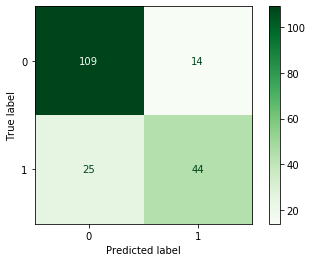

In [27]:
metrics.plot_confusion_matrix(knn, X_test_processed, y_test, cmap=plt.cm.Greens)

### Search for an optimal value of `k` for KNN


In [28]:
k_range = list(range(1, 20, 2))
k_range

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [29]:
k_range = list(range(1, 20, 2)) # testing odd ks between 1 and 19
k_train_scores = []
k_test_scores = []

for k in k_range:
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_processed, y_train)
    
    train_preds = knn.predict(X_train_processed)
    test_preds = knn.predict(X_test_processed)

    #Compute f1score on the training set
    k_train_scores.append(metrics.f1_score(y_train, train_preds))  
    #Compute f1score on the test set
    k_test_scores.append(metrics.f1_score(y_test, test_preds))  

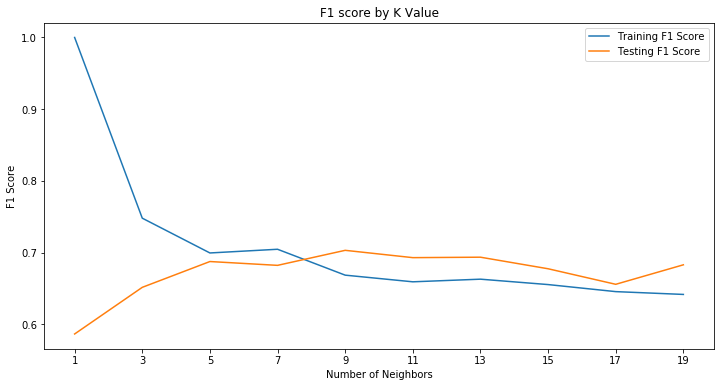

In [30]:
# Generate plot
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_train_scores, label='Training F1 Score')
plt.plot(k_range, k_test_scores, label='Testing F1 Score')
plt.title('F1 score by K Value')
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Score')
plt.xticks(k_range)
plt.legend()
plt.show()

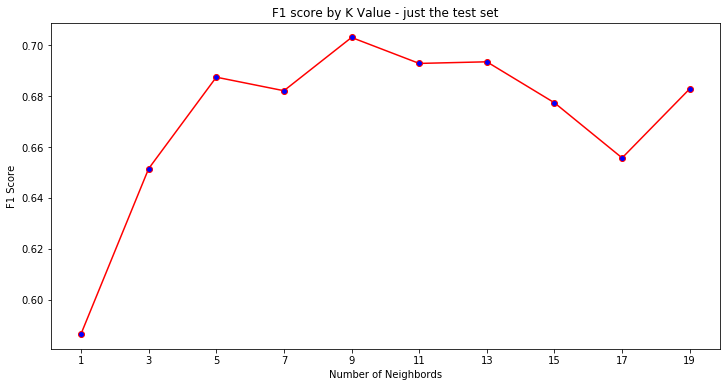

In [31]:
# zoom in just on test scores
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_test_scores, color='red', marker='o', markerfacecolor='blue')
plt.title('F1 score by K Value - just the test set')  
plt.xlabel('Number of Neighbords')  
plt.ylabel('F1 Score') 
plt.xticks(k_range)
plt.show()

### What value of K performs best on our Test data?
- 9: best performing score

Here we use F score, what other metrics could we use?

In [32]:
# instantiate the model (using some other value)
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')

# fit the model with data
knn.fit(X_train_processed, y_train)

# make class predictions for the testing set
y_pred_train = knn.predict(X_train_processed)
y_pred_test = knn.predict(X_test_processed)

In [33]:
print(f'Accuracy: {metrics.accuracy_score(y_train, y_pred_train):.4f}')
print(f'F1: {metrics.f1_score(y_train, y_pred_train):.4f}')

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred_test):.4f}')
print(f'F1: {metrics.f1_score(y_test, y_pred_test):.4f}')

Accuracy: 1.0000
F1: 1.0000
Accuracy: 0.8021
F1: 0.7077


In [34]:
k_train_scores = []
k_test_scores = []

for k in k_range:
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    
    #Fit the model
    knn.fit(X_train_processed, y_train)
    
    train_preds = knn.predict(X_train_processed)
    test_preds = knn.predict(X_test_processed)

    #Compute f1score on the training set
    k_train_scores.append(metrics.f1_score(y_train, train_preds))  
    #Compute f1score on the test set
    k_test_scores.append(metrics.f1_score(y_test, test_preds))  

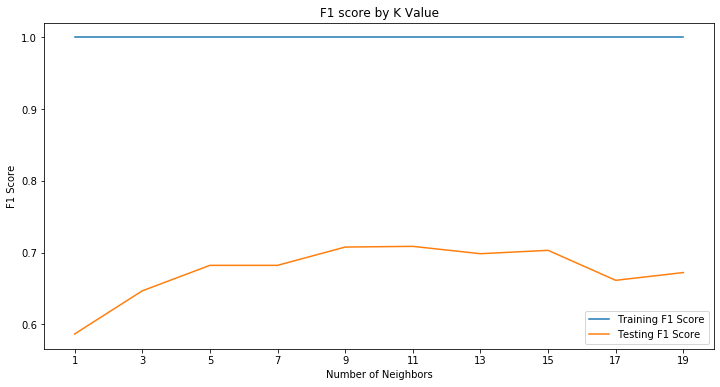

In [35]:
# Generate plot
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_train_scores, label='Training F1 Score')
plt.plot(k_range, k_test_scores, label='Testing F1 Score')
plt.title('F1 score by K Value')
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Score')
plt.xticks(k_range)
plt.legend()
plt.show()

### How do you think K size relates to our concepts of bias and variance?

![bias variance notes](images/K-NN_Neighborhood_Size_print.png)

## Review - Pros and Cons of KNNs 

**Pros:**
- No assumptions about data — useful, for example, for nonlinear data
- Simple algorithm — to explain and understand/interpret
- High accuracy (relatively) — it is pretty high but not competitive in comparison to better supervised learning models
- Versatile — useful for classification or regression

**Cons:**
- Computationally expensive — because the algorithm stores all of the training data
- High memory requirement
- Stores all (or almost all) of the training data
- Prediction stage might be slow (with big N)
- Sensitive to irrelevant features and the scale of the data

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)
    
- [Curse of Dimensionality](https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)